=== Logistic Regression ===
Train Accuracy: 0.8284883720930233
Test Accuracy: 0.8272771317829457

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      2063
           1       0.83      0.83      0.83      2065

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



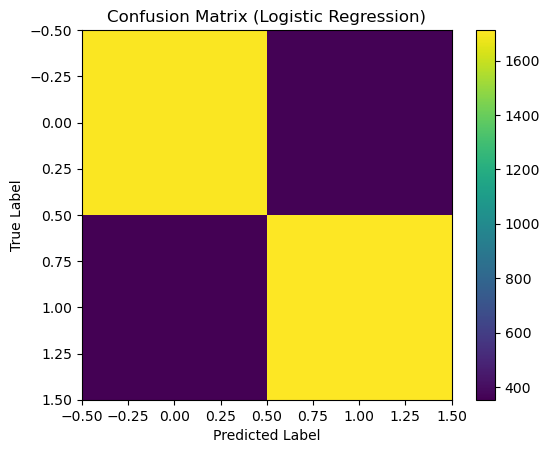

In [1]:
# Logistic Regression on California Housing Dataset (Binary Classification)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Load Dataset
# -----------------------------
data = fetch_california_housing()
X, y = data.data, data.target

# Convert regression target to binary classification
# 1 = above median house value, 0 = below median
median_value = np.median(y)
y_binary = (y >= median_value).astype(int)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Logistic Regression Model
# -----------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# -----------------------------
# Evaluation
# -----------------------------
print("=== Logistic Regression ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm)
plt.title("Confusion Matrix (Logistic Regression)")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Summary & Discussion

#We applied **Logistic Regression** to classify California housing districts as having median house values **above or below the dataset median**. Logistic Regression models the probability of a binary outcome using a sigmoid function applied to a linear combination of features.

#**Key Points:**
#- Feature scaling was essential for stable optimization and convergence.
#- Logistic Regression provided strong baseline classification performance.
#- The confusion matrix shows balanced performance across both classes.

#**Limitations:**
#- Logistic Regression assumes a linear decision boundary in feature space.
#- Performance may degrade when relationships between features and the target are highly non-linear.

#**Potential Improvements:**
#- Add regularization tuning (L1 or L2 penalties).
#- Use non-linear models such as Neural Networks or Kernel SVMs.
#- Engineer interaction or polynomial features.

#**Conclusion:**
#Logistic Regression is a simple yet powerful classification model that provides interpretable results and serves as a strong baseline for binary classification problems.
